<a href="https://colab.research.google.com/github/Madhuanabala/breast-cancer/blob/data-collection/exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2025-01-16 12:09:06--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:bf9e, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M   146MB/s    in 0.6s    

2025-01-16 12:09:07 (146 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_1

In [ ]:
import pandas as pd
df=pd.read_csv('/content/_breast cancer bioactivity_preprocessed_data.csv')
df

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value
0,CHEMBL266703,CC/C(=C(/c1ccc(O)cc1)c1ccc(OCCN(C)CCOCCO/N=C/c...,active,40.0
1,CHEMBL2145445,CC/C(=C(/c1ccc(O)cc1)c1ccc(OCN(C)C)cc1)c1ccccc...,active,100.0
2,CHEMBL266185,CC/C(=C(/c1ccc(O)cc1)c1ccc(OCCN(C)CCO/N=C/c2cc...,active,60.0
3,CHEMBL19195,CC/C(=C(/c1ccc(O)cc1)c1ccc(OCN(C)C)cc1)c1ccccc1,inactive,20000.0
4,CHEMBL83,CC/C(=C(\c1ccccc1)c1ccc(OCCN(C)C)cc1)c1ccccc1,active,50.0
...,...,...,...,...
2454,CHEMBL5406910,N#CC1=C(N)OC2=C(c3ccccc3C2=O)C12C(=O)Nc1ccc(Br...,intermediate,3600.0
2455,CHEMBL5426464,N#CC1=C(N)OC2=C(C(=O)CO2)C12C(=O)Nc1ccc(I)cc12,intermediate,3600.0
2456,CHEMBL5413813,N#CC1=C(N)OC2=C(C(=O)CO2)C12C(=O)Nc1ccccc12,intermediate,3600.0
2457,CHEMBL5396777,N#CC1=C(N)OC2=C(C(=O)CO2)C12C(=O)Nc1ccc(Cl)cc12,intermediate,3600.0


In [ ]:
!pip install rdkit-pypi
import sys
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors,Lipinski



     |████████████████████████████████| 29.2 MB 92 kB/s 


In [ ]:
def lipinski(smiles, verbose=False):

    moldata= []
    invalid_smiles_count = 0
    for elem in smiles:
        if isinstance(elem, str):
            mol=Chem.MolFromSmiles(elem)
            if mol is not None:
               moldata.append(mol)
            else:
              invalid_smiles_count +=1
              print(f"Invalid SMILES string: {elem}")
        else:
            invalid_smiles_count += 1
            print(f"Invalid input type. Expected string, got: {type(elem)}, value:{elem}")
    if invalid_smiles_count > 0:
        print(f"Number of invalid SMILES strings: {invalid_smiles_count}")
    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
          baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors


In [ ]:
df_lipinski = lipinski(df.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,1179.286,6.17790,9.0,20.0
1,917.021,5.66050,7.0,15.0
2,1135.233,6.16130,9.0,19.0
3,373.496,5.65920,1.0,3.0
4,371.524,5.99610,0.0,2.0
...,...,...,...,...
2454,420.222,2.97068,2.0,5.0
2455,421.150,1.01608,2.0,6.0
2456,295.254,0.41148,2.0,6.0
2457,329.699,1.06488,2.0,6.0


In [ ]:
df_combined = pd.concat([df,df_lipinski],axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,bioactivity_class,standard_value,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL266703,CC/C(=C(/c1ccc(O)cc1)c1ccc(OCCN(C)CCOCCO/N=C/c...,active,40.0,1179.286,6.17790,9.0,20.0
1,CHEMBL2145445,CC/C(=C(/c1ccc(O)cc1)c1ccc(OCN(C)C)cc1)c1ccccc...,active,100.0,917.021,5.66050,7.0,15.0
2,CHEMBL266185,CC/C(=C(/c1ccc(O)cc1)c1ccc(OCCN(C)CCO/N=C/c2cc...,active,60.0,1135.233,6.16130,9.0,19.0
3,CHEMBL19195,CC/C(=C(/c1ccc(O)cc1)c1ccc(OCN(C)C)cc1)c1ccccc1,inactive,20000.0,373.496,5.65920,1.0,3.0
4,CHEMBL83,CC/C(=C(\c1ccccc1)c1ccc(OCCN(C)C)cc1)c1ccccc1,active,50.0,371.524,5.99610,0.0,2.0
...,...,...,...,...,...,...,...,...
2454,CHEMBL5406910,N#CC1=C(N)OC2=C(c3ccccc3C2=O)C12C(=O)Nc1ccc(Br...,intermediate,3600.0,420.222,2.97068,2.0,5.0
2455,CHEMBL5426464,N#CC1=C(N)OC2=C(C(=O)CO2)C12C(=O)Nc1ccc(I)cc12,intermediate,3600.0,421.150,1.01608,2.0,6.0
2456,CHEMBL5413813,N#CC1=C(N)OC2=C(C(=O)CO2)C12C(=O)Nc1ccccc12,intermediate,3600.0,295.254,0.41148,2.0,6.0
2457,CHEMBL5396777,N#CC1=C(N)OC2=C(C(=O)CO2)C12C(=O)Nc1ccc(Cl)cc12,intermediate,3600.0,329.699,1.06488,2.0,6.0


In [ ]:
def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9)
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis=1)
    return x

In [ ]:
df_combined.standard_value.describe()



,standard_value
count,2459.000000
mean,18277.310638
std,39662.854061
min,0.002000
25%,173.000000
50%,2600.000000
75%,15000.000000
max,300000.000000


In [ ]:
-np.log10((10**-9)* 100000000)


1.0

In [ ]:
-np.log10((10**-9)*10000000000)

-1.0

In [ ]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis=1)
    return x

In [ ]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL266703,CC/C(=C(/c1ccc(O)cc1)c1ccc(OCCN(C)CCOCCO/N=C/c...,active,1179.286,6.17790,9.0,20.0,40.0
1,CHEMBL2145445,CC/C(=C(/c1ccc(O)cc1)c1ccc(OCN(C)C)cc1)c1ccccc...,active,917.021,5.66050,7.0,15.0,100.0
2,CHEMBL266185,CC/C(=C(/c1ccc(O)cc1)c1ccc(OCCN(C)CCO/N=C/c2cc...,active,1135.233,6.16130,9.0,19.0,60.0
3,CHEMBL19195,CC/C(=C(/c1ccc(O)cc1)c1ccc(OCN(C)C)cc1)c1ccccc1,inactive,373.496,5.65920,1.0,3.0,20000.0
4,CHEMBL83,CC/C(=C(\c1ccccc1)c1ccc(OCCN(C)C)cc1)c1ccccc1,active,371.524,5.99610,0.0,2.0,50.0
...,...,...,...,...,...,...,...,...
2454,CHEMBL5406910,N#CC1=C(N)OC2=C(c3ccccc3C2=O)C12C(=O)Nc1ccc(Br...,intermediate,420.222,2.97068,2.0,5.0,3600.0
2455,CHEMBL5426464,N#CC1=C(N)OC2=C(C(=O)CO2)C12C(=O)Nc1ccc(I)cc12,intermediate,421.150,1.01608,2.0,6.0,3600.0
2456,CHEMBL5413813,N#CC1=C(N)OC2=C(C(=O)CO2)C12C(=O)Nc1ccccc12,intermediate,295.254,0.41148,2.0,6.0,3600.0
2457,CHEMBL5396777,N#CC1=C(N)OC2=C(C(=O)CO2)C12C(=O)Nc1ccc(Cl)cc12,intermediate,329.699,1.06488,2.0,6.0,3600.0


In [ ]:
df_norm.standard_value_norm.describe()

,standard_value_norm
count,2459.000000
mean,18277.310638
std,39662.854061
min,0.002000
25%,173.000000
50%,2600.000000
75%,15000.000000
max,300000.000000


In [ ]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL266703,CC/C(=C(/c1ccc(O)cc1)c1ccc(OCCN(C)CCOCCO/N=C/c...,active,1179.286,6.17790,9.0,20.0,7.397940
1,CHEMBL2145445,CC/C(=C(/c1ccc(O)cc1)c1ccc(OCN(C)C)cc1)c1ccccc...,active,917.021,5.66050,7.0,15.0,7.000000
2,CHEMBL266185,CC/C(=C(/c1ccc(O)cc1)c1ccc(OCCN(C)CCO/N=C/c2cc...,active,1135.233,6.16130,9.0,19.0,7.221849
3,CHEMBL19195,CC/C(=C(/c1ccc(O)cc1)c1ccc(OCN(C)C)cc1)c1ccccc1,inactive,373.496,5.65920,1.0,3.0,4.698970
4,CHEMBL83,CC/C(=C(\c1ccccc1)c1ccc(OCCN(C)C)cc1)c1ccccc1,active,371.524,5.99610,0.0,2.0,7.301030
...,...,...,...,...,...,...,...,...
2454,CHEMBL5406910,N#CC1=C(N)OC2=C(c3ccccc3C2=O)C12C(=O)Nc1ccc(Br...,intermediate,420.222,2.97068,2.0,5.0,5.443697
2455,CHEMBL5426464,N#CC1=C(N)OC2=C(C(=O)CO2)C12C(=O)Nc1ccc(I)cc12,intermediate,421.150,1.01608,2.0,6.0,5.443697
2456,CHEMBL5413813,N#CC1=C(N)OC2=C(C(=O)CO2)C12C(=O)Nc1ccccc12,intermediate,295.254,0.41148,2.0,6.0,5.443697
2457,CHEMBL5396777,N#CC1=C(N)OC2=C(C(=O)CO2)C12C(=O)Nc1ccc(Cl)cc12,intermediate,329.699,1.06488,2.0,6.0,5.443697


In [ ]:
df_final.pIC50.describe()

,pIC50
count,2459.000000
mean,5.891016
std,1.423424
min,3.522879
25%,4.823909
50%,5.585027
75%,6.762019
max,11.698970


In [ ]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL266703,CC/C(=C(/c1ccc(O)cc1)c1ccc(OCCN(C)CCOCCO/N=C/c...,active,1179.286,6.17790,9.0,20.0,7.397940
1,CHEMBL2145445,CC/C(=C(/c1ccc(O)cc1)c1ccc(OCN(C)C)cc1)c1ccccc...,active,917.021,5.66050,7.0,15.0,7.000000
2,CHEMBL266185,CC/C(=C(/c1ccc(O)cc1)c1ccc(OCCN(C)CCO/N=C/c2cc...,active,1135.233,6.16130,9.0,19.0,7.221849
3,CHEMBL19195,CC/C(=C(/c1ccc(O)cc1)c1ccc(OCN(C)C)cc1)c1ccccc1,inactive,373.496,5.65920,1.0,3.0,4.698970
4,CHEMBL83,CC/C(=C(\c1ccccc1)c1ccc(OCCN(C)C)cc1)c1ccccc1,active,371.524,5.99610,0.0,2.0,7.301030
...,...,...,...,...,...,...,...,...
2436,CHEMBL5440580,CC[C@@]12CCCN3C(=O)C=C4c5ccccc5N(C(=O)CC1)[C@]432,inactive,308.381,2.93910,0.0,2.0,5.000000
2437,CHEMBL5417545,CC[C@@]12CCCN3C(=O)C(Cl)=C4c5ccccc5N(C(=O)CC1)...,inactive,342.826,3.50560,0.0,2.0,5.000000
2439,CHEMBL225542,O=C(NNc1nc2cc(F)ccc2n2cccc12)c1cnccn1,active,322.303,2.17350,2.0,6.0,6.397940
2440,CHEMBL1093100,Cc1ccc(Sc2cccc3[nH]c4nc(N)nc(N)c4c23)cc1,inactive,321.409,3.73512,3.0,5.0,4.924453


In [ ]:
output_file = "bcfiltered_bioactivity_data.csv"
df_2class.to_csv(output_file, index=False)

print(f"Data saved to {output_file}")

Data saved to bcfiltered_bioactivity_data.csv


In [25]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

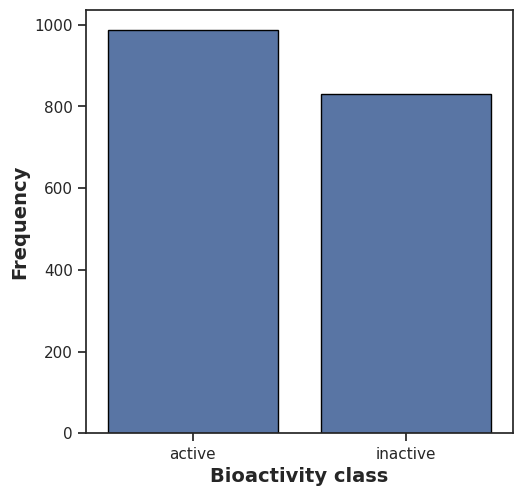

In [28]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.jpg')

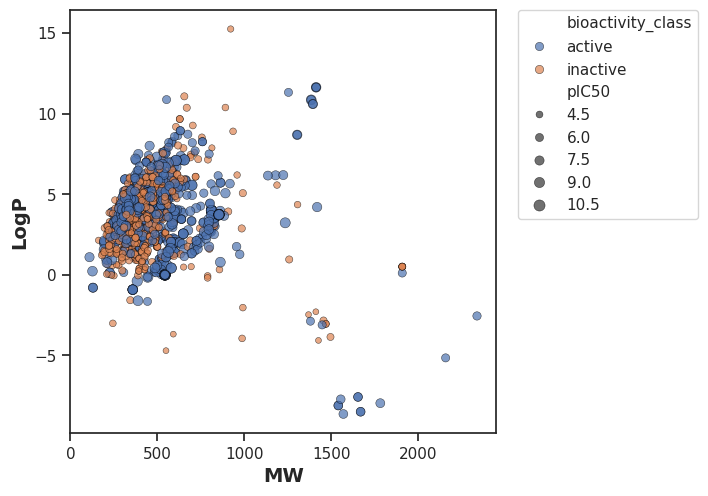

In [29]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.jpg')

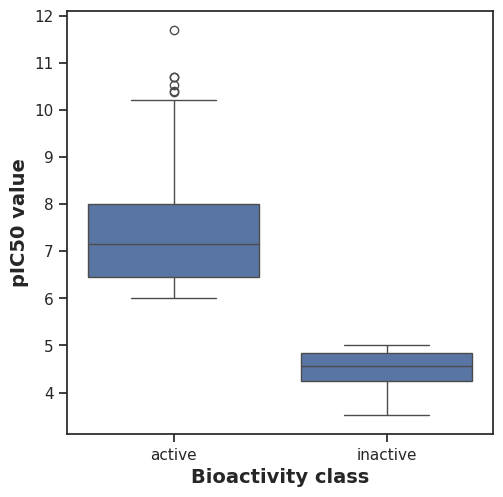

In [30]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.jpg')

In [32]:
def mannwhitney(descriptor, verbose=False):
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu
  seed(1)


  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

  stat, p = mannwhitneyu(active, inactive)
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)
  return results




In [33]:
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,819210.0,4.861652e-296,0.05,Different distribution (reject H0)


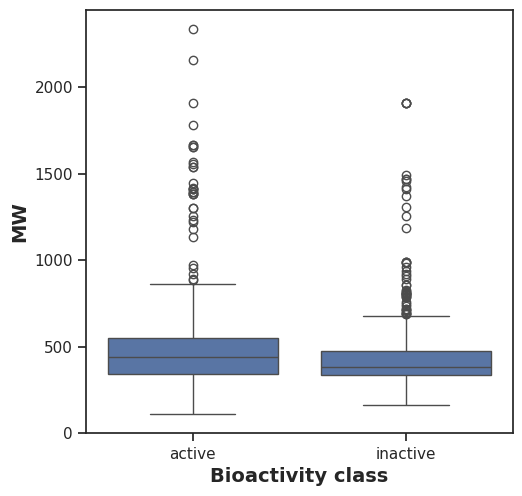

In [34]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.jpg')

In [35]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,488230.0,1.693935e-12,0.05,Different distribution (reject H0)


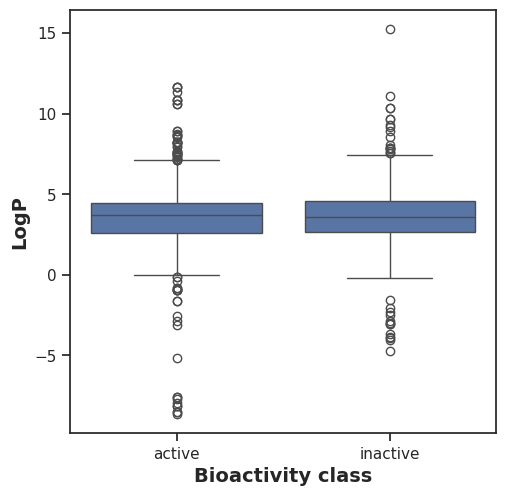

In [36]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.jpg')

In [37]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,405858.5,0.736679,0.05,Same distribution (fail to reject H0)


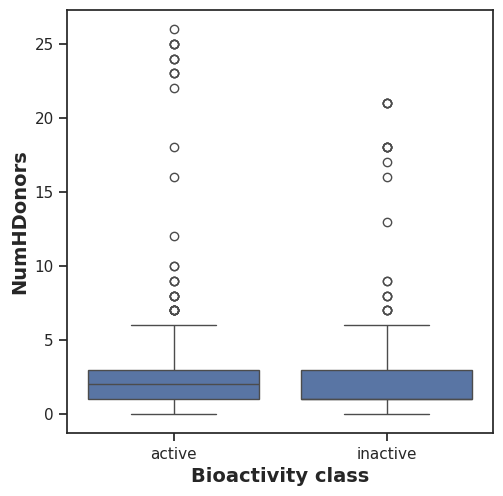

In [38]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.jpg')

In [39]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,446515.5,0.000686,0.05,Different distribution (reject H0)


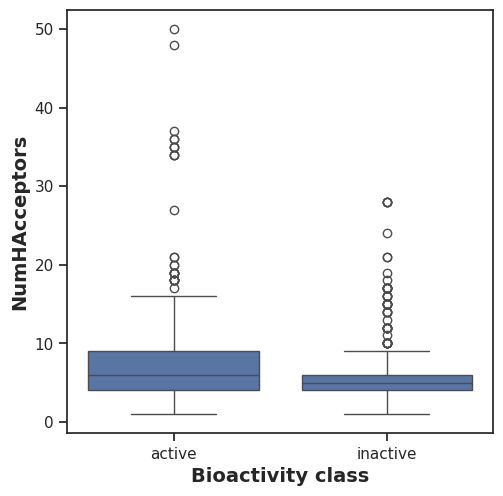

In [40]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.jpg')

In [41]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,526529.0,3.755987e-26,0.05,Different distribution (reject H0)


In [42]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,526529.0,3.755987e-26,0.05,Different distribution (reject H0)


In [45]:
! zip -r results.zip . -i *.csv *.jpg

updating: bcfiltered_bioactivity_data.csv (deflated 80%)
updating: mannwhitneyu_LogP.csv (deflated 8%)
updating: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
updating: mannwhitneyu_pIC50.csv (deflated 10%)
updating: mannwhitneyu_NumHDonors.csv (deflated 11%)
updating: _breast cancer bioactivity_preprocessed_data.csv (deflated 85%)
updating: mannwhitneyu_MW.csv (deflated 10%)
  adding: plot_LogP.jpg (deflated 41%)
  adding: plot_NumHDonors.jpg (deflated 40%)
  adding: plot_bioactivity_class.jpg (deflated 52%)
  adding: plot_NumHAcceptors.jpg (deflated 41%)
  adding: plot_ic50.jpg (deflated 41%)
  adding: plot_MW.jpg (deflated 40%)
  adding: plot_MW_vs_LogP.jpg (deflated 24%)
